# Ola Booking Analysis – Data Visualization


## Objective
The objective of this notebook is to visually analyze the Ola ride dataset to understand:
- Ride completion patterns
- Revenue distribution
- Cancellation and incomplete ride reasons
- TAT (Turn Around Time) metrics
- Customer experience through ratings
- Payment method trends
- Relationship between ride distance and revenue

This will help identify operational challenges, revenue leakages, and opportunities for business improvement.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
plt.style.use('dark_background')


### Load Cleaned Data

In [3]:
df=pd.read_csv("../outputs/ola_booking_cleaned.csv")
df.head()

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,cancelled_rides_by_driver,incomplete_rides,incomplete_rides_reason,booking_value,payment_method,ride_distance,driver_ratings,customer_rating,payment_value
0,2025-01-29,02:18:00,MUM0000001,Incomplete,CUST73037,Prime SUV,Ghatkopar West,Thane East,10.0,30.0,NO,NO,Yes,Driver unable to locate pickup,360.22,CASH,0.00,0.0,0.0,180.11
1,2025-01-12,13:33:00,MUM0000002,Cancelled,CUST37992,eBike,Malad East,Thane West,NaN,NaN,NO,Vehicle or personal issue,No,NaN,570.47,Not Charged,0.00,0.0,0.0,0.00
2,2025-01-23,16:05:00,MUM0000003,Incomplete,CUST68431,eBike,Bandra West,Colaba,10.0,30.0,NO,NO,Yes,Payment issue,147.72,CASH,0.00,0.0,0.0,0.00
3,2025-01-16,20:35:00,MUM0000004,Completed,CUST55906,eBike,Mulund West,Goregaon East,16.0,10.0,NO,NO,No,NaN,863.22,UPI,15.76,3.5,4.2,863.22
4,2025-01-16,21:42:00,MUM0000005,Incomplete,CUST29698,Mini,Mulund East,Cuffe Parade,10.0,30.0,NO,NO,Yes,Payment issue,749.76,UPI,0.00,0.0,0.0,0.00


### 1.Booking Status Distribution

**Business Question:**  
How many rides are completed, cancelled, or incomplete?


##### Chart Type -> Bar Chart

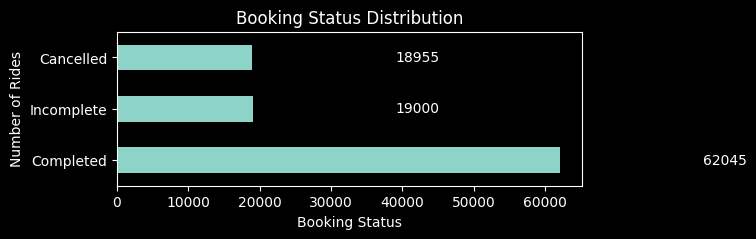

In [4]:
plt.figure(figsize=(6,2))

ax=df['booking_status'].value_counts().plot(kind='barh')
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Number of Rides')

for p in ax.patches:
    ax.text(p.get_width() + 20000,p.get_y() + p.get_height()/2, str(p.get_width()), va='center')
plt.show()

**Insight:**  

- Majority of rides are completed successfully.  
- Cancelled and incomplete rides indicate revenue leakage and operational issues.


### 2️. Revenue Contribution by Booking Status


**Business Question:**  
Which ride category contributes the most to revenue?

##### Chart Type -> Bar Chart (Sum of payment_value)

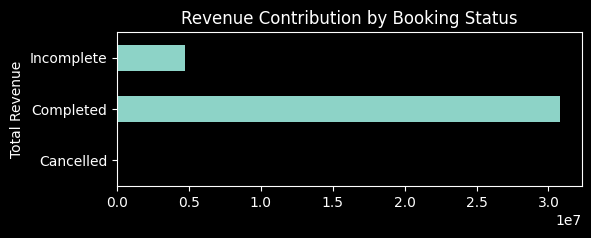

In [5]:
plt.figure(figsize=(6,2))
df.groupby('booking_status')['payment_value'].sum().plot(kind='barh')
plt.title('Revenue Contribution by Booking Status')
plt.ylabel('Total Revenue')
plt.show()

**Insight:**  
- Completed rides contribute 100% of revenue.  
- Incomplete rides caused by driver-side issues contribute only 50% of booking value.  
- Cancelled rides do not contribute to revenue.

### 3️. Payment Method Analysis


**Business Question:**  
What are the preferred payment methods among customers?

##### Chart Type -> pie Chart 

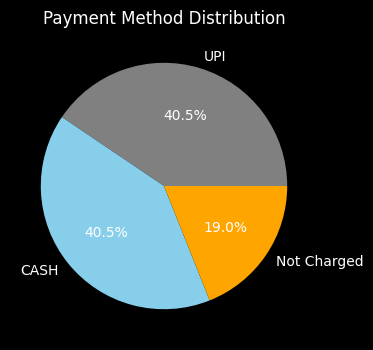

In [6]:
plt.figure(figsize=(6,4))
df['payment_method'].value_counts().plot(kind='pie',colors=["gray", "skyblue", "orange"], autopct='%0.1f%%')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()


**Insight:** 
- UPI is the most used payment method, showing strong adoption of digital payments.
- Cash is used less than UPI, but still significant for certain rides.
- Cancelled bookings were not charged, highlighting that revenue is only collected for completed rides.
- The proportion of not-charged cancelled rides is visible, which can help in planning strategies to reduce cancellations or encourage pre-payment.

 ### 4. Cancellation Analysis 

**Business Question:**  
Why are rides getting cancelled?


##### Chart Type -> Bar Chart 

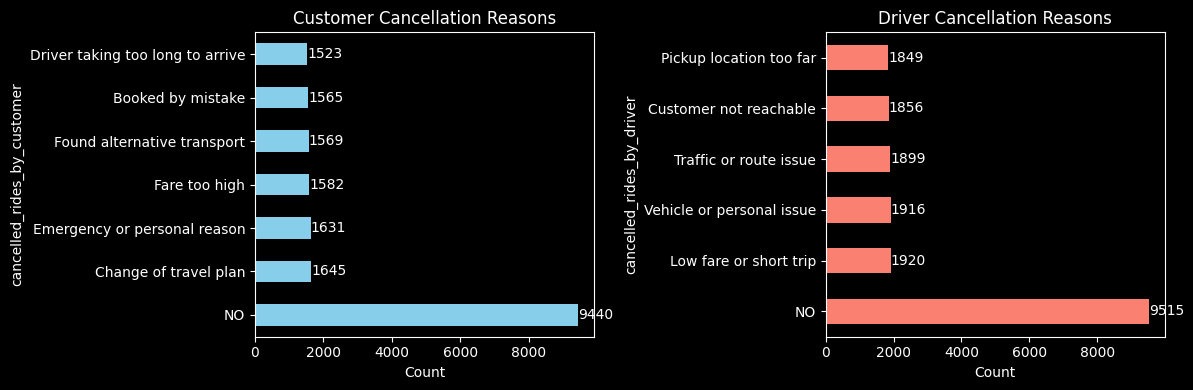

In [7]:
# Cancelled rides data
cancel_df = df[df['booking_status'] == 'Cancelled']

# Data and chart details
charts = {
    'Customer Cancellation Reasons': cancel_df['cancelled_rides_by_customer'].value_counts(),
    'Driver Cancellation Reasons': cancel_df['cancelled_rides_by_driver'].value_counts()
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12,4))

for ax, (title, counts) in zip(axes, charts.items()):
    counts.plot(kind='barh', ax=ax, color='skyblue' if 'Customer' in title else 'salmon')
    ax.set_title(title)
    ax.set_xlabel('Count')
    # Add counts on bars
    for i, v in enumerate(counts):
        ax.text(v + 1, i, str(v), va='center')

plt.tight_layout()
plt.savefig("can_analysis.png")
plt.show()

**Insight:** 
######  Most rides are not cancelled, as indicated by the large “NO” bars.
###### Customer cancellations are mainly due to:
- Change of travel plan
- Fare too high
- Booking mistakes or alternative transport
###### Driver cancellations are mostly due to:
- Low fare or short trips
- Vehicle/personal issues
- Traffic or route problems

### 5️. Incomplete Ride Analysis


**Business Question:**  
Why do rides remain incomplete?

##### Chart Type -> Bar Chart 

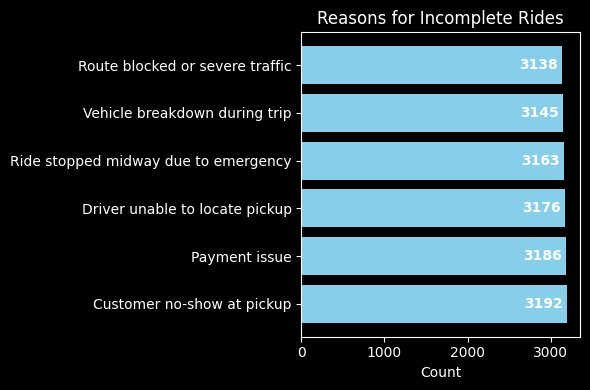

In [8]:

inc_df = df[df['booking_status'] == 'Incomplete']

inc_counts = inc_df['incomplete_rides_reason'].value_counts()

# Create horizontal bar chart
fix, ax = plt.subplots(figsize=(6,4))
ax.barh(inc_counts.index, inc_counts.values, color='skyblue')
plt.title('Reasons for Incomplete Rides')
plt.xlabel('Count')

# Add numbers at edge of bars
for i, v in enumerate(inc_counts.values):
    ax.text(v-50, i, str(v), ha='right', va='center',color='white', fontweight='bold')  # v+0.5 = thoda gap right side

plt.tight_layout()
plt.show()

**Insight:**  
- Most incomplete rides are due to customer no-show and payment issues, followed closely by driver unable to locate pickup, ride stopped midway, vehicle breakdown, and route/traffic problems.
- Counts for all reasons are roughly similar (around 3100–3200), indicating multiple factors contribute almost equally to incomplete rides.
- Highlights the need for better driver-customer coordination, payment handling, and traffic-aware planning to reduce incomplete rides.

### 6️. TAT (Turn Around Time) Analysis

**Business Question:**  
Are vehicle arrival and trip completion times within operational expectations?

##### Chart Type -> Box Plot 

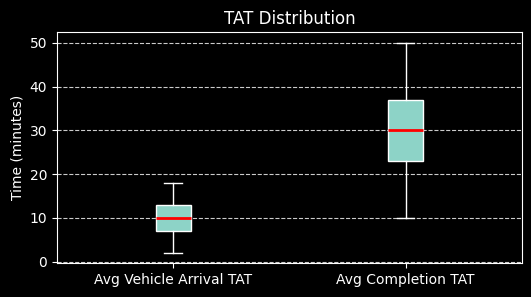

In [9]:
plt.figure(figsize=(6,3))

plt.boxplot(
    [df['avg_vtat'].dropna(), df['avg_ctat'].dropna()],
    tick_labels=['Avg Vehicle Arrival TAT', 'Avg Completion TAT'],
    patch_artist=True,
    medianprops=dict(color='red', linewidth=2)

)

plt.title('TAT Distribution')
plt.ylabel('Time (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.show()


**Method:**  
- Missing TAT values for incomplete rides were filled using median values from completed rides to avoid bias from outliers.

**Insight:**  
- Trip completion time (CTAT) is consistently higher than vehicle arrival time (VTAT), which is expected.  
- Median imputation ensures meaningful comparison across ride statuses.


### 7️. Customer Rating Analysis

**Business Question:**  
What is the overall customer experience?

##### Chart Type -> Histogram

**Insight:**  
- Majority of ratings are 4+, indicating a positive customer experience for completed rides.
- Incomplete and cancelled rides show 0 ratings because ratings are collected only for completed trips, not due to poor service.

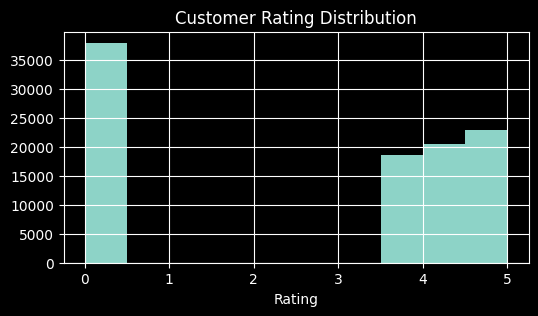

In [10]:
plt.figure(figsize=(6,3))
df['customer_rating'].hist(bins=10)
plt.title('Customer Rating Distribution')
plt.xlabel('Rating')
plt.show()

### 8️. Ride Distance vs Revenue

**Business Question:**  
Does ride distance influence revenue?

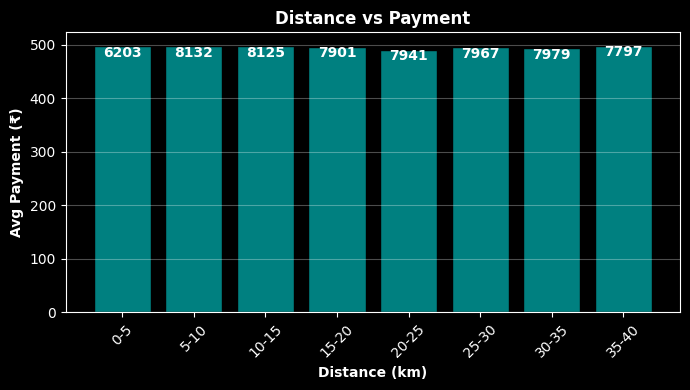

In [11]:

df_clean = df[(df['booking_status'] == 'Completed') & (df['ride_distance'] > 0)]
df_clean=df_clean.copy()

bins = range(0, int(df_clean['ride_distance'].max()) + 5, 5)
df_clean['distance_group'] = pd.cut(df_clean['ride_distance'], bins=bins)
grouped = df_clean.groupby('distance_group', observed=False)['payment_value'].agg(['mean', 'count'])

plt.figure(figsize=(7, 4))
bars = plt.bar(range(len(grouped)), grouped['mean'], color='teal', edgecolor='black')
for i, (bar, count) in enumerate(zip(bars, grouped['count'])):
    plt.text(i, bar.get_height() - 20, f'{count}', ha='center', fontweight='bold')
    
plt.xticks(range(len(grouped)), [f'{int(x.left)}-{int(x.right)}' for x in grouped.index], rotation=45)
plt.xlabel('Distance (km)', fontweight='bold')
plt.ylabel('Avg Payment (₹)', fontweight='bold')
plt.title('Distance vs Payment', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

 **Insight:** 
The analysis reveals a FLAT REVENUE PATTERN of ~₹500 per ride regardless 
of distance traveled (0-5km to 35-40km), indicating that the business 
operates on a BASE FARE + TIME-BASED pricing model rather than traditional 
distance-based pricing.

   ###### KEY FINDING:
- Short rides (1-5km): Avg ₹500 → Per km rate: ₹100-250/km
- Long rides (35-40km): Avg ₹500 → Per km rate: ₹12-15/km

 ###### BUSINESS IMPLICATION:
Short-distance rides generate 10-20X higher per-kilometer revenue, making 
them significantly more profitable. The company should strategically focus 
on maximizing short-distance bookings for optimal revenue generation and 
operational efficiency.

 ###### RECOMMENDATION:
Prioritize short-distance rides (under 10km) to maximize profitability 
while maintaining service quality for longer routes.
